In [45]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
# to create datasets from sklearn 
from sklearn.datasets import make_blobs 
import time

In [46]:
np.random.seed(3) # making sure same instance of random number generation takes place.

[]

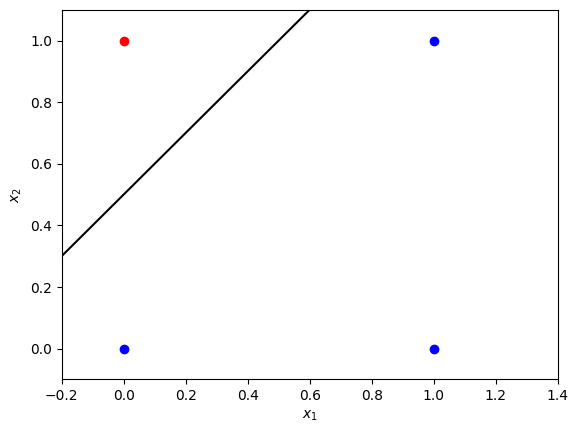

In [47]:
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
x_line = np.arange(xmin, xmax, 0.1)
# see graph below, making points and coloring them
ax.scatter(0, 0, color="b")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="b")
ax.scatter(1, 1, color="b")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
# One of the lines which can be used as a decision boundary to separate two classes.
ax.plot(x_line, x_line + 0.5, color="black")
plt.plot()

In [48]:
# Preparing data sets: where rows contains features x1, x2 and number of columns = number of datapoints.
# so here 2 rows meaning 2 features, x1(1) = X[0][0] and x2(1) = X[1][0] and corresponding target will be y = Y[0][0]
# similary for last feature will be x1(30) = X[0][29] and x2(30) = X[1][29] and corresponding target will be y = Y[0][29]

number_of_data_points = 30

X= np.random.randint(0,2,(2,number_of_data_points))
print(X)
Y = np.logical_and(X[0] == 0, X[1] == 1).astype(int).reshape((1, number_of_data_points))
print("The X feature has: x1 and x2 in rows respectively",X)
print("The Y output/target has class 0 for blue and red for 1:", Y)

print("First x1,x2 for 1st data point will be",X[0][0], X[1][0], "Their corresponding target is:", Y[0][0])
print("First x1,x2 for 2nt data point will be",X[0][1], X[1][1], "Their corresponding target is:", Y[0][1])
print("First x1,x2 for last data point (30) will be",X[0][29], X[1][29], "Their corresponding target is:", Y[0][29])

 
print("Shape is",X.shape)
print("Shape is", Y.shape)
print("Training examples", X.shape[1])

[[0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0]
 [0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0]]
The X feature has: x1 and x2 in rows respectively [[0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0]
 [0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0]]
The Y output/target has class 0 for blue and red for 1: [[0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0]]
First x1,x2 for 1st data point will be 0 0 Their corresponding target is: 0
First x1,x2 for 2nt data point will be 0 1 Their corresponding target is: 1
First x1,x2 for last data point (30) will be 0 0 Their corresponding target is: 0
Shape is (2, 30)
Shape is (1, 30)
Training examples 30


In [49]:
#Defining activation function
def sigmoid(z):
    return 1/(1 + np.exp(-z))
print("Sigmoid for -2:", sigmoid(-2))
print("Sigmoid for 0:", sigmoid(0))
print("Sigmoid for 1:", sigmoid(1))

Sigmoid for -2: 0.11920292202211755
Sigmoid for 0: 0.5
Sigmoid for 1: 0.7310585786300049


In [50]:
# Neural network model setup
def layer_size(X,Y):
    n_x = X.shape[0]
    n_y = Y.shape[0]
    return (n_x,n_y)
(n_x,n_y) = layer_size(X,Y)

print("Input Layer x will have", n_x)
print("Input Layer y will have", n_y)

Input Layer x will have 2
Input Layer y will have 1


In [51]:
def initialize_parameters(n_x, n_y):
    print("Initializing params")
    params_w = np.random.randn(n_y,n_x) * 0.1
    params_b = np.zeros((n_y,1))
    parameters = {"W": params_w, "b": params_b}
    return parameters


In [59]:
def forward_propagation(X,parameters):
    print('I am forward propagation', parameters, X.shape)
    params_w = parameters['W']
    params_b = parameters['b']
    print(params_w.shape)
    start = time.time()
    y_hat = np.dot(params_w,X) + params_b
    end = time.time()
    
    print(y_hat, end-start)
    start_1 = time.time()
    y_hat_another = np.matmul(params_w,X) +params_b
    start_1_end = time.time()
    print(y_hat_another, start_1 - start_1_end)
    A = sigmoid(y_hat)
    return A
parameters = initialize_parameters(n_x,n_y)
predicted_y_shape = forward_propagation(X,parameters).shape
predicted_y = forward_propagation(X,parameters)
print('Result of forward propagation', predicted_y)

Initializing params
I am forward propagation {'W': array([[-0.12441233, -0.06264169]]), 'b': array([[0.]])} (2, 30)
(1, 2)
[[ 0.         -0.06264169 -0.12441233 -0.18705402 -0.06264169  0.
  -0.06264169 -0.12441233 -0.12441233 -0.18705402 -0.06264169 -0.12441233
  -0.12441233 -0.18705402  0.         -0.18705402 -0.12441233 -0.06264169
  -0.06264169 -0.06264169 -0.06264169 -0.12441233 -0.18705402  0.
   0.         -0.06264169 -0.18705402 -0.06264169  0.          0.        ]] 0.0002193450927734375
[[ 0.         -0.06264169 -0.12441233 -0.18705402 -0.06264169  0.
  -0.06264169 -0.12441233 -0.12441233 -0.18705402 -0.06264169 -0.12441233
  -0.12441233 -0.18705402  0.         -0.18705402 -0.12441233 -0.06264169
  -0.06264169 -0.06264169 -0.06264169 -0.12441233 -0.18705402  0.
   0.         -0.06264169 -0.18705402 -0.06264169  0.          0.        ]] -3.5762786865234375e-05
I am forward propagation {'W': array([[-0.12441233, -0.06264169]]), 'b': array([[0.]])} (2, 30)
(1, 2)
[[ 0.         -0

In [60]:
def compute_cost(predicted_y , actual_y):
    # cost = -actual_y*log(predicted_y) - (1-y)log(1-predicted_y)
    cost = np.multiply(np.log(predicted_y), actual_y ) - np.multiply((1-actual_y),np.log(1-predicted_y))
    return cost

print(compute_cost(predicted_y, Y))
    

[[ 0.69314718 -0.72495844  0.63287457  0.60398746 -0.72495844  0.69314718
  -0.72495844  0.63287457  0.63287457  0.60398746 -0.72495844  0.63287457
   0.63287457  0.60398746  0.69314718  0.60398746  0.63287457 -0.72495844
  -0.72495844 -0.72495844 -0.72495844  0.63287457  0.60398746  0.69314718
   0.69314718 -0.72495844  0.60398746 -0.72495844  0.69314718  0.69314718]]


In [78]:
def back_propagation(X,actual_y,predicted_y):
    print(X.shape, actual_y.shape, predicted_y.shape)
    total_number_of_data_set = X.shape[1]
    difference  = predicted_y - actual_y
    #gradient_of_cost_function_w_r_t_b = (1/total_number_of_data_set) * difference
    gradient_of_cost_function_w_r_t_b = (1/total_number_of_data_set) * np.sum(difference, axis=1,keepdims=True)
    gradient_of_cost_function_w_r_t_w =  (1/total_number_of_data_set) * np.matmul((difference) ,X.T)
    print("Gradients of cost function w.r.t b",gradient_of_cost_function_w_r_t_b)
    print("Gradients of cost function w.r.t w", gradient_of_cost_function_w_r_t_b)
    gradients = {"dW" : gradient_of_cost_function_w_r_t_w, "db": gradient_of_cost_function_w_r_t_b}
    return gradients

gradients = back_propagation(X,Y,predicted_y)
    

(2, 30) (1, 30) (1, 30)
Gradients of cost function w.r.t b [[0.14487467]]
Gradients of cost function w.r.t w [[0.14487467]]


In [79]:
def update_parameters(parameters, gradients, learning_rate=1.2):
    W = parameters["W"]
    b = parameters["b"]
    grads_w = gradients["dW"]
    grads_b = gradients["db"]
    updated_w  = W- learning_rate * grads_w
    updated_b = b - learning_rate*grads_b
    params = {"W" : updated_w, "b": updated_b}
    return params

parameters_updated = update_parameters(parameters, gradients, 1.2)

In [89]:
def nn_model(X,Y, iterations =10, learning_rate = 1.2,print_cost = False):
    n_x = layer_size(X,Y)[0] # since input features are only 2.
    n_y = layer_size(X,Y)[1] # only 1 outputs for clasissification either 1 or 0
    params = initialize_parameters(n_x,n_y)
    for i in range(0, iterations):
        predicted_y = forward_propagation(X,params)
        cost = compute_cost(predicted_y,Y)
        gradients = back_propagation(X,Y,predicted_y)
        params = update_parameters(params,gradients,learning_rate)
        if(print_cost):
            print("The cost in iterations %d is %f", i, cost)
    return params
print(nn_model(X,Y, 50))

Initializing params
I am forward propagation {'W': array([[-0.05966496, -0.05885944]]), 'b': array([[0.]])} (2, 30)
(1, 2)
[[ 0.         -0.05885944 -0.05966496 -0.1185244  -0.05885944  0.
  -0.05885944 -0.05966496 -0.05966496 -0.1185244  -0.05885944 -0.05966496
  -0.05966496 -0.1185244   0.         -0.1185244  -0.05966496 -0.05885944
  -0.05885944 -0.05885944 -0.05885944 -0.05966496 -0.1185244   0.
   0.         -0.05885944 -0.1185244  -0.05885944  0.          0.        ]] 2.9802322387695312e-05
[[ 0.         -0.05885944 -0.05966496 -0.1185244  -0.05885944  0.
  -0.05885944 -0.05966496 -0.05966496 -0.1185244  -0.05885944 -0.05966496
  -0.05966496 -0.1185244   0.         -0.1185244  -0.05966496 -0.05885944
  -0.05885944 -0.05885944 -0.05885944 -0.05966496 -0.1185244   0.
   0.         -0.05885944 -0.1185244  -0.05885944  0.          0.        ]] -2.09808349609375e-05
(2, 30) (1, 30) (1, 30)
Gradients of cost function w.r.t b [[0.15236441]]
Gradients of cost function w.r.t w [[0.1523644